In [1]:
# go go
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

from prepare import *
from helper_functions import *

sns.set()
pd.set_option('display.max_columns', None)

In [2]:
# load player data base, check info
pf = pd.read_csv('PlayerData.csv', index_col = 0)
pf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 382 entries, 0 to 2087
Data columns (total 47 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   PlayerID                               382 non-null    int64  
 1   Player_Name                            382 non-null    object 
 2   Age                                    382 non-null    float64
 3   Height                                 379 non-null    float64
 4   MaxRank                                382 non-null    float64
 5   Hand                                   382 non-null    object 
 6   Country                                382 non-null    object 
 7   win_count                              382 non-null    float64
 8   lose_count                             382 non-null    float64
 9   match_count                            382 non-null    float64
 10  win%                                   382 non-null    float64
 11  aces_

In [3]:
# load matches dataframe
df = prepare_atp()

# Explore
---

### Roger Federer
What makes Roger Federer a great player? Let's look at his overall stats for the past 21 years.

In [4]:
# lowercase column names so I don't have to press shift as much
pf.columns = pf.columns.str.lower()

In [5]:
# rename columns for clarity
pf = pf.rename(columns = {'maxrank': 'max_rank',
                          'ace_count': 'ace_total',
                          'aces_per_game': 'avg_aces_per_match',
                          'breakpoints_per_game': 'avg_breakpoints_per_match',
                          'first_serve_percentage_match_won': 'first_serve_percentage_matches_won',
                          'first_serve_percentage_match_lost': 'first_serve_percentage_matches_lost',
                          'first_serve_won_percentage_match_won': 'first_serve_won_percentage_matches_won',
                          'first_serve_won_percentage_match_lost': 'first_serve_won_percentage_matches_lost'
                         }
              )

In [6]:
# review columns
pf.head(1)

,playerid,player_name,age,height,max_rank,hand,country,win_count,lose_count,match_count,win%,aces_in_match_lost,aces_in_match_won,ace_total,avg_aces_per_match,first_serve_percentage_matches_lost,first_serve_percentage_matches_won,first_serve_won_percentage_matches_lost,first_serve_won_percentage_matches_won,breakpoints_won_match_lost,breakpoints_won_match_won,breakpoint_count,avg_breakpoints_per_match,win_count_30,loss_count_30,win_count_100,loss_count_100,total_top30_matches,total_top100_matches,top_30_win%,top_100_win%,hard_surface_win,hard_surface_loss,hard_surface_match_count,hard_win%,clay_surface_win,clay_surface_loss,clay_surface_match_count,clay_win%,grass_surface_win,grass_surface_loss,grass_surface_match_count,grass_win%,carpet_surface_win,carpet_surface_loss,carpet_surface_match_count,carpet_win%
0,103720,Lleyton Hewitt,20.752909,180.0,1.0,R,AUS,458.0,196.0,654.0,0.7,1034.0,2823.0,3857.0,5.898,0.525558,0.539098,0.675974,0.77347,407.0,1947.0,2354.0,3.599388,134.0,110.0,351.0,184.0,244.0,535.0,0.54918,0.656075,265.0,118.0,383.0,0.691906,85.0,46.0,131.0,0.648855,93.0,27.0,120.0,0.775,15.0,5.0,20.0,0.75


In [7]:
# get concrete percentage column
# pf['hard_number_first_serve_percentage_match_won'] = pf.first_serve_percentage_match_won * 100
ratios = ['win%',
          'first_serve_percentage_matches_won',
          'first_serve_percentage_matches_lost',
          'first_serve_won_percentage_matches_lost',
          'first_serve_won_percentage_matches_won', 
          'top_30_win%',
          'top_100_win%',
          'hard_win%',
          'clay_win%',
          'grass_win%',
          'carpet_win%'
         ]

for decimal in ratios:
    pf[f'hard_number_{decimal}'] = pf[decimal] * 100

In [8]:
# get length of player database
len(pf)

382

There are 382 players in the database.

Who are these players?

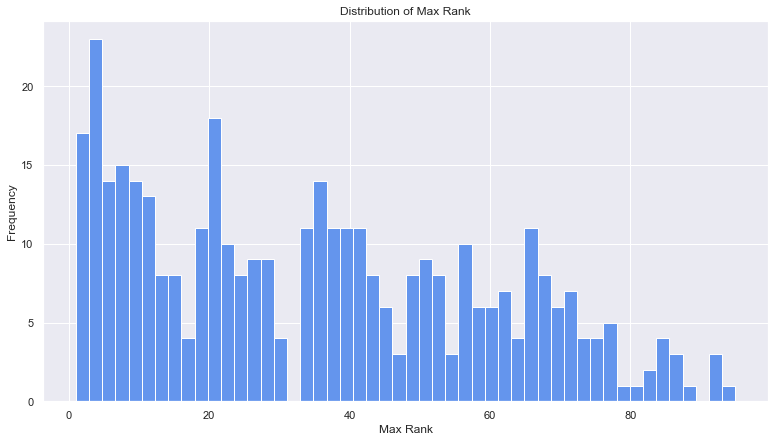

In [9]:
# plot distribution of max rank
plt.figure(figsize = (13, 7))
pf.max_rank.hist(color = 'cornflowerblue', bins = 50)
plt.ylabel('Frequency')
plt.xlabel('Max Rank')
plt.title('Distribution of Max Rank');

These players all achieved a rank of 100 or better within the years 1999-2019. These are 'Top-100' players.

In [10]:
# set a list of numeric columns
quant_vars = list(pf.select_dtypes('float64').columns)

In [11]:
# get all bounds for outliers
bounds = get_all_the_bounds(pf, quant_vars)
bounds

,lower_bound,upper_bound
feature,,
age,17.091718,35.752909
height,165.000000,205.000000
max_rank,-51.500000,118.500000
win_count,-134.625000,320.375000
lose_count,-88.500000,283.500000
match_count,-227.000000,621.000000
win%,0.205000,0.725000
aces_in_match_lost,-461.750000,1336.250000
aces_in_match_won,-958.125000,2076.875000


In [12]:
# get extreme bounds
extreme_bounds = get_all_the_bounds(pf, quant_vars, 3)
extreme_bounds

,lower_bound,upper_bound
feature,,
age,10.093771,42.750856
height,150.000000,220.000000
max_rank,-115.250000,182.250000
win_count,-305.250000,491.000000
lose_count,-228.000000,423.000000
match_count,-545.000000,939.000000
win%,0.010000,0.920000
aces_in_match_lost,-1136.000000,2010.500000
aces_in_match_won,-2096.250000,3215.000000


In [48]:
# summary statistics
summary_stats = pf[quant_vars].describe().T
summary_stats

,count,mean,std,min,25%,50%,75%,max
age,382.0,26.490684,3.120101,19.178645,24.089665,26.331280,28.754962,36.418891
height,379.0,185.551451,6.791246,168.000000,180.000000,185.000000,190.000000,208.000000
max_rank,382.0,34.984293,24.577688,1.000000,12.250000,33.500000,54.750000,95.000000
win_count,382.0,114.301047,117.184114,13.000000,36.000000,69.000000,149.750000,907.000000
lose_count,382.0,103.285340,63.926219,25.000000,51.000000,83.000000,144.000000,327.000000
match_count,382.0,217.586387,172.181302,51.000000,91.000000,154.000000,303.000000,1119.000000
win%,382.0,0.470052,0.103475,0.230000,0.400000,0.460000,0.530000,0.840000
aces_in_match_lost,382.0,516.882199,475.305101,27.000000,212.500000,377.500000,662.000000,4813.000000
aces_in_match_won,382.0,745.683246,935.686811,16.000000,180.000000,384.500000,938.750000,6829.000000
ace_total,382.0,1262.565445,1367.335372,44.000000,414.500000,791.000000,1592.500000,10076.000000


In [14]:
# pull up Roger Federer stats
rf = pf[pf.player_name == 'Roger Federer']
rf

,playerid,player_name,age,height,max_rank,hand,country,win_count,lose_count,match_count,win%,aces_in_match_lost,aces_in_match_won,ace_total,avg_aces_per_match,first_serve_percentage_matches_lost,first_serve_percentage_matches_won,first_serve_won_percentage_matches_lost,first_serve_won_percentage_matches_won,breakpoints_won_match_lost,breakpoints_won_match_won,breakpoint_count,avg_breakpoints_per_match,win_count_30,loss_count_30,win_count_100,loss_count_100,total_top30_matches,total_top100_matches,top_30_win%,top_100_win%,hard_surface_win,hard_surface_loss,hard_surface_match_count,hard_win%,clay_surface_win,clay_surface_loss,clay_surface_match_count,clay_win%,grass_surface_win,grass_surface_loss,grass_surface_match_count,grass_win%,carpet_surface_win,carpet_surface_loss,carpet_surface_match_count,carpet_win%,hard_number_win%,hard_number_first_serve_percentage_matches_won,hard_number_first_serve_percentage_matches_lost,hard_number_first_serve_won_percentage_matches_lost,hard_number_first_serve_won_percentage_matches_won,hard_number_top_30_win%,hard_number_top_100_win%,hard_number_hard_win%,hard_number_clay_win%,hard_number_grass_win%,hard_number_carpet_win%
133,103819,Roger Federer,22.485969,185.0,1.0,R,SUI,907.0,212.0,1119.0,0.81,1541.0,6829.0,8370.0,7.48,0.597457,0.629201,0.701538,0.796579,391.0,3238.0,3629.0,3.243074,407.0,146.0,786.0,200.0,553.0,986.0,0.735986,0.79716,552.0,120.0,672.0,0.821429,189.0,57.0,246.0,0.768293,132.0,19.0,151.0,0.874172,34.0,16.0,50.0,0.68,81.0,62.920077,59.745743,70.153832,79.65789,73.598553,79.716024,82.142857,76.829268,87.417219,68.0


Let's look at aces 
* Roger Federer served 8370 aces from 1999 to 2019
* He has an average of 7.48 aces a match

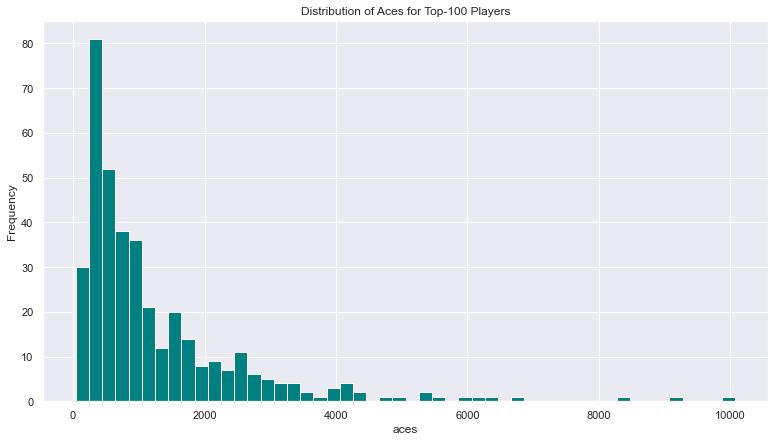

In [15]:
# plot distribution of aces
plt.figure(figsize = (13, 7))
pf.ace_total.hist(color = 'teal', bins = 50)
plt.ylabel('Frequency')
plt.xlabel('aces')
plt.title('Distribution of Aces for Top-100 Players');

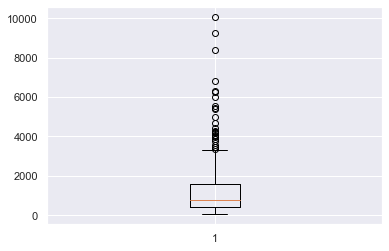

In [16]:
# view boxplot distribution of aces
plt.boxplot(pf.ace_total);

In [17]:
# view extreme upper bound for aces
extreme_bounds.loc['ace_total', 'upper_bound']

5126.5

Roger Federer is an extreme outlier when it comes to total aces.

Domain knowledge supplement (DKS): This is a lot of free points for Federer. One and done. That is much less work than playing out a 5, 10, or 20 ball rally. I wish I could somehow measure how much less stress this is on the mind and body.

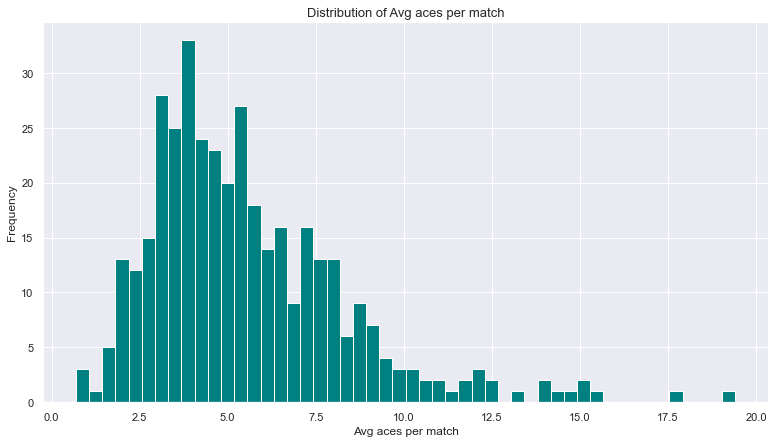

In [45]:
distribution(pf, 'avg_aces_per_match')

In [46]:
# locate upper bound for average aces per match
bounds.loc['avg_aces_per_match', 'upper_bound']

12.150125

In [49]:
# locate mean for average aces per match
summary_stats.loc['avg_aces_per_match', 'mean']

5.559458115183249

Federer is not an outlier when it comes to average aces per match, but he is above average.

Let's look at height.

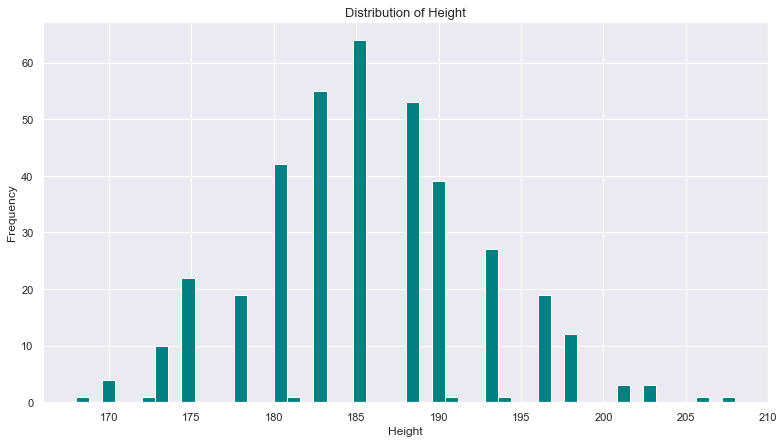

In [18]:
distribution(pf, 'height')

Roger Federer is right smack in the middle of a normal distribution of heights. He is not an outlier here. His height of 185 cm does not distinguish him as a great player.

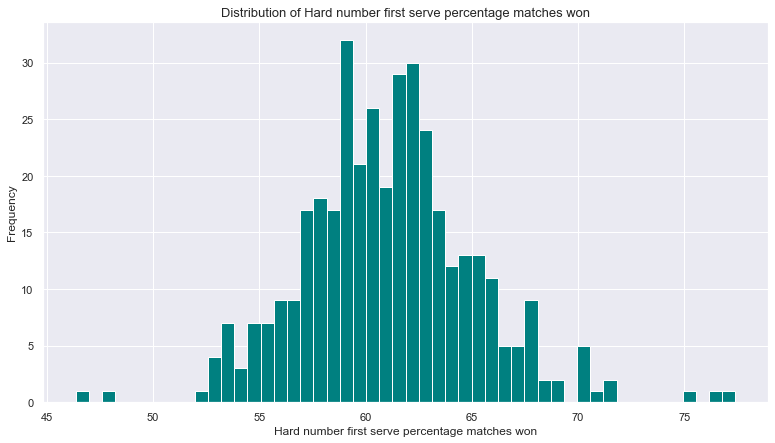

In [19]:
distribution(pf, 'hard_number_first_serve_percentage_matches_won')

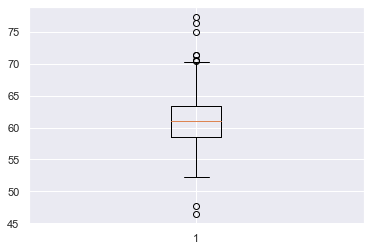

In [20]:
# look at box distribution of first serve percentage in matches won
plt.boxplot(pf.hard_number_first_serve_percentage_matches_won);

In [21]:
# get outlier bounds for first first serve percentage in matches won
get_lower_and_upper_bounds(pf['hard_number_first_serve_percentage_matches_won'])

(51.440765981849715, 70.45672371614853)

In [22]:
# pull up 
rf.hard_number_first_serve_percentage_matches_won

133    62.920077
Name: hard_number_first_serve_percentage_matches_won, dtype: float64

Roger Federer is not an outlier here, but instead is marginally above average when it comes to percentage of first serves served in matches won.

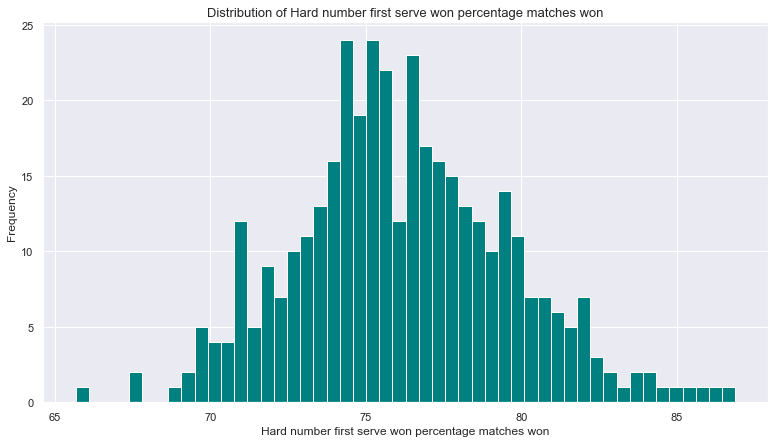

In [23]:
distribution(pf, 'hard_number_first_serve_won_percentage_matches_won')

In [24]:
bounds.loc['hard_number_first_serve_won_percentage_matches_won', 'upper_bound']

84.90694982134664

In [25]:
# review 
rf.hard_number_first_serve_won_percentage_matches_won

133    79.65789
Name: hard_number_first_serve_won_percentage_matches_won, dtype: float64

Roger Federer is above average when it comes to percent of first serve points won, but not an outlier. Still, he is above average at around 80% of first serve points won.

Let's look at matches played between 1999 - 2019.

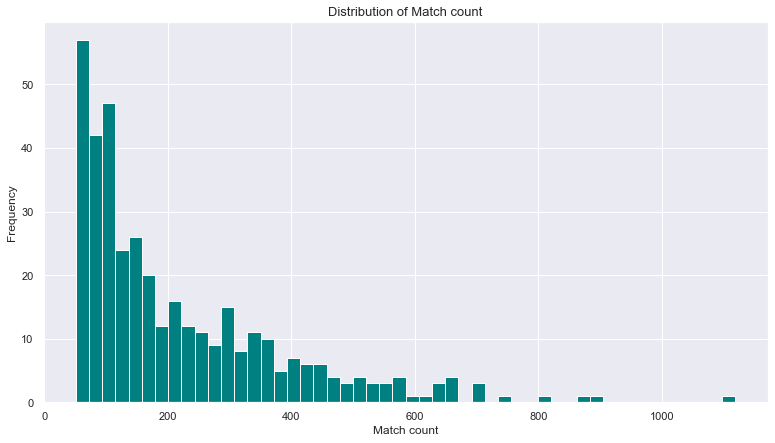

In [26]:
distribution(pf, 'match_count')

In [27]:
# review upper bound for matches played
extreme_bounds.loc['match_count', 'upper_bound']

939.0

In [28]:
# review Federer match count
rf.match_count

133    1119.0
Name: match_count, dtype: float64

Roger Federer is an extreme outlier when it comes to total matches played from 1999 - 2019 for players who achieved a max rank of 100 or better in this time period.

DKS: Players leave the tour for a number of reasons, but top-100 players largely leave because tennis takes a toll on the body over the years. They quit because they have to. Roger Federer has been able to play so many matches over such a long period of time because he has had few injuries (relative to other top 100 players) throughout his career.

### Roger Federer vs Novak Djokovic

## Initial Questions
I. How do key rivalries play out on clay? On grass? On hard court?

II. How do key rivalries play out in best of 3 matches vs best of 5? Do rivalries take a different story at Grand Slam events?

III. Often players will rake in many wins against a rival, and then the dynamic will significantly change, and the rival will rake most of the wins in. What are the drivers that determine a change in the dynamic between two players? Is there anything in our data set to suggest a change in dynamic?

In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 35967 entries, 1999-01-11 to 2019-11-24
Data columns (total 78 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   tourney_id                        35967 non-null  object 
 1   tourney_name                      35967 non-null  object 
 2   surface                           35967 non-null  object 
 3   draw_size                         35967 non-null  int64  
 4   tourney_level                     35967 non-null  object 
 5   match_num                         35967 non-null  int64  
 6   score                             35967 non-null  object 
 7   best_of                           35967 non-null  int64  
 8   round                             35967 non-null  object 
 9   minutes                           35967 non-null  float64
 10  player_1                          35967 non-null  object 
 11  player_2                          35967 non-null  

### EQ I

In [31]:
# collect all records of Roger Federer vs Novak Djokovic
fed_v_djok = df[(df.player_1 == 'Roger Federer') & (df.player_2 == 'Novak Djokovic')]
djok_v_fed = df[(df.player_1 == 'Novak Djokovic') & (df.player_2 == 'Roger Federer')]

# slam records together
Federer_vs_Djokovic = pd.concat([fed_v_djok, djok_v_fed])

In [32]:
# preview
Federer_vs_Djokovic.head(2)

,tourney_id,tourney_name,surface,draw_size,tourney_level,match_num,score,best_of,round,minutes,player_1,player_2,player_1_age,player_2_age,player_1_hand,player_2_hand,player_1_ht,player_2_ht,player_1_id,player_2_id,player_1_ioc,player_2_ioc,player_1_rank,player_2_rank,player_1_rank_points,player_2_rank_points,player_1_seed,player_2_seed,player_1_aces,player_2_aces,player_1_double_faults,player_2_double_faults,player_1_service_points,player_2_service_points,player_1_first_serves_in,player_2_first_serves_in,player_1_first_serve_points_won,player_2_first_serve_points_won,player_1_second_serve_points_won,player_2_second_serve_points_won,player_1_service_game_total,player_2_service_game_total,player_1_break_points_saved,player_2_break_points_saved,player_1_break_points_faced,player_2_break_points_faced,winner,player_1_first_serve_%,player_2_first_serve_%,player_1_first_serve_win_%,player_2_first_serve_win_%,player_1_break_points_won,player_2_break_points_won,player_1_wins,player_1_seeded,player_2_seeded,surface_Carpet,surface_Clay,surface_Grass,surface_Hard,tourney_level_A,tourney_level_D,tourney_level_F,tourney_level_G,tourney_level_M,player_1_hand_L,player_1_hand_R,player_2_hand_L,player_2_hand_R,round_ER,round_F,round_QF,round_R128,round_R16,round_R32,round_R64,round_RR,round_SF
tourney_date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2006-04-17,2006-410,Monte Carlo Masters,Clay,64,M,1,6-3 2-6 6-3,3,R64,109.0,Novak Djokovic,Roger Federer,18.904860,24.689938,R,R,188.0,185.0,104925,103819,SRB,SUI,67.0,1.0,606.0,6810.0,Unseeded,1.0,1.0,1.0,4.0,0.0,94.0,73.0,61.0,39.0,36.0,28.0,19.0,21.0,13.0,13.0,8.0,0.0,11.0,2.0,Roger Federer,0.648936,0.534247,0.590164,0.717949,2.0,3.0,False,False,True,0,1,0,0,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,1,0,0
2007-01-15,2007-580,Australian Open,Hard,128,G,113,6-2 7-5 6-3,5,R16,110.0,Novak Djokovic,Roger Federer,19.652293,25.437372,R,R,188.0,185.0,104925,103819,SRB,SUI,15.0,1.0,1530.0,8120.0,14.0,1.0,7.0,12.0,2.0,1.0,101.0,80.0,62.0,50.0,38.0,40.0,18.0,20.0,14.0,15.0,3.0,1.0,8.0,2.0,Roger Federer,0.613861,0.625000,0.612903,0.800000,1.0,5.0,False,True,True,0,0,0,1,0,0,0,1,0,0,1,0,1,0,0,0,0,1,0,0,0,0


In [33]:
# tail end of data
Federer_vs_Djokovic.tail(2)

,tourney_id,tourney_name,surface,draw_size,tourney_level,match_num,score,best_of,round,minutes,player_1,player_2,player_1_age,player_2_age,player_1_hand,player_2_hand,player_1_ht,player_2_ht,player_1_id,player_2_id,player_1_ioc,player_2_ioc,player_1_rank,player_2_rank,player_1_rank_points,player_2_rank_points,player_1_seed,player_2_seed,player_1_aces,player_2_aces,player_1_double_faults,player_2_double_faults,player_1_service_points,player_2_service_points,player_1_first_serves_in,player_2_first_serves_in,player_1_first_serve_points_won,player_2_first_serve_points_won,player_1_second_serve_points_won,player_2_second_serve_points_won,player_1_service_game_total,player_2_service_game_total,player_1_break_points_saved,player_2_break_points_saved,player_1_break_points_faced,player_2_break_points_faced,winner,player_1_first_serve_%,player_2_first_serve_%,player_1_first_serve_win_%,player_2_first_serve_win_%,player_1_break_points_won,player_2_break_points_won,player_1_wins,player_1_seeded,player_2_seeded,surface_Carpet,surface_Clay,surface_Grass,surface_Hard,tourney_level_A,tourney_level_D,tourney_level_F,tourney_level_G,tourney_level_M,player_1_hand_L,player_1_hand_R,player_2_hand_L,player_2_hand_R,round_ER,round_F,round_QF,round_R128,round_R16,round_R32,round_R64,round_RR,round_SF
tourney_date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2019-07-01,2019-540,Wimbledon,Grass,128,G,226,7-6(5) 1-6 7-6(4) 4-6 13-12,5,F,297.0,Novak Djokovic,Roger Federer,32.109514,37.894593,R,R,188.0,185.0,104925,103819,SRB,SUI,1.0,3.0,12415.0,6620.0,1.0,2.0,10.0,25.0,9.0,6.0,219.0,203.0,136.0,127.0,101.0,100.0,39.0,39.0,34.0,34.0,6.0,5.0,13.0,8.0,Novak Djokovic,0.621005,0.625616,0.742647,0.787402,3.0,7.0,True,True,True,0,0,1,0,0,0,0,1,0,0,1,0,1,0,1,0,0,0,0,0,0,0
2019-11-11,2019-0605,Tour Finals,Hard,8,F,291,6-4 6-3,3,RR,73.0,Novak Djokovic,Roger Federer,32.473648,38.258727,R,R,188.0,185.0,104925,103819,SRB,SUI,2.0,3.0,8945.0,6190.0,2.0,3.0,2.0,12.0,3.0,2.0,62.0,49.0,46.0,36.0,26.0,29.0,7.0,9.0,10.0,9.0,4.0,1.0,7.0,1.0,Roger Federer,0.741935,0.734694,0.565217,0.805556,0.0,3.0,False,True,True,0,0,0,1,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0


In [34]:
# Djokovic is always player 1 in our data set
Federer_vs_Djokovic.player_1.value_counts()

Novak Djokovic    41
Name: player_1, dtype: int64

How does their rivary play out on different surfaces?

In [35]:
Federer_vs_Djokovic[Federer_vs_Djokovic.surface == 'Clay'].player_1_wins

tourney_date
2006-04-17    False
2008-04-20    False
2009-04-27     True
2012-05-13     True
2012-05-27     True
2014-04-13    False
2015-05-10     True
Name: player_1_wins, dtype: bool

In [36]:
Federer_vs_Djokovic[Federer_vs_Djokovic.surface == 'Grass'].player_1_wins

tourney_date
2012-06-25    False
2014-06-23     True
2019-07-01     True
Name: player_1_wins, dtype: bool

In [37]:
Federer_vs_Djokovic[Federer_vs_Djokovic.surface == 'Hard'].player_1_wins

tourney_date
2007-01-15    False
2007-02-26    False
2007-08-27    False
2008-01-14     True
2008-08-25    False
2009-03-25     True
2009-08-16    False
2009-08-31    False
2010-08-09    False
2010-08-30     True
2010-10-10    False
2010-11-21    False
2011-01-17     True
2011-02-21     True
2011-08-29     True
2012-08-12    False
2012-11-05     True
2013-10-28     True
2013-11-04     True
2014-02-24    False
2014-03-06     True
2014-10-05    False
2015-02-23    False
2015-03-12     True
2015-08-16    False
2015-08-31     True
2015-11-15     True
2015-11-15    False
2016-01-18     True
2018-08-13     True
2019-11-11    False
Name: player_1_wins, dtype: bool

In [38]:
df[(df.player_1 == 'Ivo Karlovic') | (df.player_2 == 'Ivo Karlovic')]

,tourney_id,tourney_name,surface,draw_size,tourney_level,match_num,score,best_of,round,minutes,player_1,player_2,player_1_age,player_2_age,player_1_hand,player_2_hand,player_1_ht,player_2_ht,player_1_id,player_2_id,player_1_ioc,player_2_ioc,player_1_rank,player_2_rank,player_1_rank_points,player_2_rank_points,player_1_seed,player_2_seed,player_1_aces,player_2_aces,player_1_double_faults,player_2_double_faults,player_1_service_points,player_2_service_points,player_1_first_serves_in,player_2_first_serves_in,player_1_first_serve_points_won,player_2_first_serve_points_won,player_1_second_serve_points_won,player_2_second_serve_points_won,player_1_service_game_total,player_2_service_game_total,player_1_break_points_saved,player_2_break_points_saved,player_1_break_points_faced,player_2_break_points_faced,winner,player_1_first_serve_%,player_2_first_serve_%,player_1_first_serve_win_%,player_2_first_serve_win_%,player_1_break_points_won,player_2_break_points_won,player_1_wins,player_1_seeded,player_2_seeded,surface_Carpet,surface_Clay,surface_Grass,surface_Hard,tourney_level_A,tourney_level_D,tourney_level_F,tourney_level_G,tourney_level_M,player_1_hand_L,player_1_hand_R,player_2_hand_L,player_2_hand_R,round_ER,round_F,round_QF,round_R128,round_R16,round_R32,round_R64,round_RR,round_SF
tourney_date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2001-09-10,2001-73,Tashkent,Hard,32,A,2,7-6(3) 6-3,3,R32,82.0,Ivo Karlovic,Marc Rosset,22.532512,30.841889,R,R,208.0,201.0,103333,101820,CRO,SUI,220.0,100.0,163.0,420.0,Unseeded,Unseeded,16.0,11.0,2.0,10.0,64.0,74.0,49.0,39.0,35.0,30.0,7.0,20.0,10.0,11.0,3.0,1.0,5.0,2.0,Marc Rosset,0.765625,0.527027,0.714286,0.769231,1.0,2.0,False,False,False,0,0,0,1,1,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0
2001-12-31,2002-891,Chennai,Hard,32,A,17,7-5 6-2,3,R16,71.0,Guillermo Canas,Ivo Karlovic,24.098563,22.839151,R,R,185.0,208.0,103084,103333,ARG,CRO,15.0,193.0,1572.0,197.0,1.0,Unseeded,3.0,11.0,0.0,3.0,54.0,72.0,40.0,37.0,30.0,26.0,6.0,13.0,10.0,10.0,2.0,6.0,4.0,11.0,Guillermo Canas,0.740741,0.513889,0.750000,0.702703,5.0,2.0,True,True,False,0,0,0,1,1,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0
2002-06-10,2002-311,Queen's Club,Grass,56,A,12,7-6(6) 4-6 6-3,3,R64,117.0,Ivo Karlovic,Jan Vacek,23.279945,26.083504,R,R,208.0,198.0,103333,102788,CRO,CZE,189.0,79.0,199.0,472.0,Unseeded,Unseeded,19.0,4.0,14.0,5.0,109.0,88.0,61.0,53.0,49.0,45.0,21.0,22.0,15.0,16.0,8.0,0.0,9.0,1.0,Jan Vacek,0.559633,0.602273,0.803279,0.849057,1.0,1.0,False,False,False,0,0,1,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0
2003-06-23,2003-540,Wimbledon,Grass,128,G,1,1-6 7-6(5) 6-3 6-4,5,R128,144.0,Ivo Karlovic,Lleyton Hewitt,24.314853,22.324435,R,R,208.0,180.0,103333,103720,CRO,AUS,203.0,2.0,174.0,3940.0,Unseeded,1.0,19.0,10.0,8.0,8.0,129.0,113.0,83.0,60.0,66.0,47.0,23.0,30.0,20.0,18.0,10.0,1.0,13.0,3.0,Ivo Karlovic,0.643411,0.530973,0.795181,0.783333,2.0,3.0,True,False,True,0,0,1,0,0,0,0,1,0,0,1,0,1,0,0,0,1,0,0,0,0,0
2003-06-23,2003-540,Wimbledon,Grass,128,G,97,7-6(5) 3-6 6-3 7-6(4),5,R32,143.0,Ivo Karlovic,Max Mirnyi,24.314853,25.963039,R,R,208.0,196.0,103333,103018,CRO,BLR,203.0,43.0,174.0,860.0,Unseeded,Unseeded,25.0,7.0,4.0,3.0,121.0,126.0,77.0,87.0,68.0,72.0,24.0,27.0,21.0,21.0,1.0,3.0,2.0,4.0,Max Mirnyi,0.636364,0.690476,0.883117,0.827586,1.0,1.0,False,False,False,0,0,1,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-05-27,2019-520,Roland Garros,Clay,128,G,1215,6-3 6-4 6-7(7) 6-3,5,R64,151.0,Ivo Karlovic,Jordan Thompson,40.240931,25.100616,R,R,208.0,183.0,103333,111442,CRO,AUS,94.0,69.0,599.0,757.0,Unseeded,Unseeded,23.0,5.0,5.0,2.0,123.0,107.0,80.0,87.0,61.0,71.0,20.0,16.0,20.0,20.0,5.0,0.0,8.0,0.0,Jordan Thompson,0.6504